# Intel Stock Price (INTC) Forecasting -- DNN Classification

In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from keras.optimizers import SGD, Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [ ]:
INTC = pd.read_csv('INTC.csv')
INTC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,41.632813,43.687500,41.625000,43.500000,25.214338,57710200
1,2000-01-04,42.718750,43.937500,41.125000,41.468750,24.036938,51019600
2,2000-01-05,41.500000,42.937500,40.250000,41.812500,24.236191,52389000
3,2000-01-06,40.875000,41.687500,39.093750,39.375000,22.823311,55171200
4,2000-01-07,38.750000,41.000000,38.687500,41.000000,23.765236,41096400
...,...,...,...,...,...,...,...
5885,2023-05-24,29.309999,29.490000,28.820000,29.000000,29.000000,28045800
5886,2023-05-25,28.290001,28.290001,26.860001,27.400000,27.400000,78009400
5887,2023-05-26,27.440001,29.090000,27.100000,29.000000,29.000000,71879700
5888,2023-05-30,29.700001,30.040001,29.000000,29.990000,29.990000,54874800


In [ ]:
INTCB = INTC.copy()

# Create a new column 'Return' and initialize it to 0
INTCB['Change'] = 0

for i in range(1, len(INTCB)):

    Change = (INTCB.loc[i, 'Close'] - INTCB.loc[i-1, 'Close']) / INTCB.loc[i-1, 'Close']

    if Change > 0:
        INTCB.loc[i, 'Change'] = 1  # Represents an increase, denoted as 1
    else:
        INTCB.loc[i, 'Change'] = 0  # Represents a decrease or no change, denoted as 0

INTCB

,Date,Open,High,Low,Close,Adj Close,Volume,Change
0,2000-01-03,41.632813,43.687500,41.625000,43.500000,25.214338,57710200,0
1,2000-01-04,42.718750,43.937500,41.125000,41.468750,24.036938,51019600,0
2,2000-01-05,41.500000,42.937500,40.250000,41.812500,24.236191,52389000,1
3,2000-01-06,40.875000,41.687500,39.093750,39.375000,22.823311,55171200,0
4,2000-01-07,38.750000,41.000000,38.687500,41.000000,23.765236,41096400,1
...,...,...,...,...,...,...,...,...
5885,2023-05-24,29.309999,29.490000,28.820000,29.000000,29.000000,28045800,0
5886,2023-05-25,28.290001,28.290001,26.860001,27.400000,27.400000,78009400,0
5887,2023-05-26,27.440001,29.090000,27.100000,29.000000,29.000000,71879700,1
5888,2023-05-30,29.700001,30.040001,29.000000,29.990000,29.990000,54874800,1


In [ ]:
df2 = INTCB.copy()
df2['Date']=pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2

,Date,Open,High,Low,Close,Adj Close,Volume,Change
0,2000-01-03,41.632813,43.687500,41.625000,43.500000,25.214338,57710200,0
1,2000-01-04,42.718750,43.937500,41.125000,41.468750,24.036938,51019600,0
2,2000-01-05,41.500000,42.937500,40.250000,41.812500,24.236191,52389000,1
3,2000-01-06,40.875000,41.687500,39.093750,39.375000,22.823311,55171200,0
4,2000-01-07,38.750000,41.000000,38.687500,41.000000,23.765236,41096400,1
...,...,...,...,...,...,...,...,...
5885,2023-05-24,29.309999,29.490000,28.820000,29.000000,29.000000,28045800,0
5886,2023-05-25,28.290001,28.290001,26.860001,27.400000,27.400000,78009400,0
5887,2023-05-26,27.440001,29.090000,27.100000,29.000000,29.000000,71879700,1
5888,2023-05-30,29.700001,30.040001,29.000000,29.990000,29.990000,54874800,1


In [ ]:
new_df2=df2.iloc[:,[0,7]].copy()
new_df2

,Date,Change
0,2000-01-03,0
1,2000-01-04,0
2,2000-01-05,1
3,2000-01-06,0
4,2000-01-07,1
...,...,...
5885,2023-05-24,0
5886,2023-05-25,0
5887,2023-05-26,1
5888,2023-05-30,1


In [ ]:
# Create 3 lags
new_df2['Lag_1']=new_df2['Change'].shift(1).copy()
new_df2['Lag_2']=new_df2['Change'].shift(2).copy()
new_df2['Lag_3']=new_df2['Change'].shift(3).copy()
new_df2

,Date,Change,Lag_1,Lag_2,Lag_3
0,2000-01-03,0,NaN,NaN,NaN
1,2000-01-04,0,0.0,NaN,NaN
2,2000-01-05,1,0.0,0.0,NaN
3,2000-01-06,0,1.0,0.0,0.0
4,2000-01-07,1,0.0,1.0,0.0
...,...,...,...,...,...
5885,2023-05-24,0,0.0,1.0,1.0
5886,2023-05-25,0,0.0,0.0,1.0
5887,2023-05-26,1,0.0,0.0,0.0
5888,2023-05-30,1,1.0,0.0,0.0


In [ ]:
# Drop out missing values and rest index
clean_df2=new_df2.dropna(axis=0, how='any').copy()
clean_df2=clean_df2.reset_index(drop=True)
clean_df2
#clean_df2.to_csv('new_clean_df.csv')

,Date,Change,Lag_1,Lag_2,Lag_3
0,2000-01-06,0,1.0,0.0,0.0
1,2000-01-07,1,0.0,1.0,0.0
2,2000-01-10,1,1.0,0.0,1.0
3,2000-01-11,1,1.0,1.0,0.0
4,2000-01-12,1,1.0,1.0,1.0
...,...,...,...,...,...
5882,2023-05-24,0,0.0,1.0,1.0
5883,2023-05-25,0,0.0,0.0,1.0
5884,2023-05-26,1,0.0,0.0,0.0
5885,2023-05-30,1,1.0,0.0,0.0


In [ ]:
# Train data
Forecast_train_data2=clean_df2.iloc[0:4525,:].copy()
Forecast_train_data2

,Date,Change,Lag_1,Lag_2,Lag_3
0,2000-01-06,0,1.0,0.0,0.0
1,2000-01-07,1,0.0,1.0,0.0
2,2000-01-10,1,1.0,0.0,1.0
3,2000-01-11,1,1.0,1.0,0.0
4,2000-01-12,1,1.0,1.0,1.0
...,...,...,...,...,...
4520,2017-12-22,0,0.0,1.0,1.0
4521,2017-12-26,0,0.0,0.0,1.0
4522,2017-12-27,1,0.0,0.0,0.0
4523,2017-12-28,1,1.0,0.0,0.0


In [ ]:
# Test data
Forecast_test_data2=clean_df2.iloc[4525:4525+1362,:].copy()
Forecast_test_data2

,Date,Change,Lag_1,Lag_2,Lag_3
4525,2018-01-02,1,0.0,1.0,1.0
4526,2018-01-03,0,1.0,0.0,1.0
4527,2018-01-04,0,0.0,1.0,0.0
4528,2018-01-05,1,0.0,0.0,1.0
4529,2018-01-08,0,1.0,0.0,0.0
...,...,...,...,...,...
5882,2023-05-24,0,0.0,1.0,1.0
5883,2023-05-25,0,0.0,0.0,1.0
5884,2023-05-26,1,0.0,0.0,0.0
5885,2023-05-30,1,1.0,0.0,0.0


In [ ]:
# Rolling 1
Rol2_training_1=Forecast_train_data2.iloc[0:2260,:].copy()
Rol2_val_1=Forecast_train_data2.iloc[2260:2260+756,:].copy()

# Rolling 2
Rol2_training_2=Forecast_train_data2.iloc[749:3016,:].copy()
Rol2_val_2=Forecast_train_data2.iloc[3016:3016+754,:].copy()

# Rolling 3
Rol2_training_3=Forecast_train_data2.iloc[1504:3770,:].copy()
Rol2_val_3=Forecast_train_data2.iloc[3770:3770+775,:].copy()

In [ ]:
#set x (make prediction)
# Train
x_train2 = Rol2_training_1.drop(['Date','Change'],axis=1).copy()
#minimax scaling
MMscaler = MinMaxScaler(feature_range=(0, 1))
scalingT2 = MMscaler.fit_transform(x_train2)
scaled_x_train2 = pd.DataFrame(data=scalingT2)
scaled_x_train2.columns = ['Lag_1','Lag_2','Lag_3']

# Validation
x_val2 = Rol2_val_1.drop(['Date','Change'],axis=1).copy()
#minimax scaling
MMscaler = MinMaxScaler(feature_range=(0, 1))
scalingV2 = MMscaler.fit_transform(x_val2)
scaled_x_val2 = pd.DataFrame(data=scalingV2)
scaled_x_val2.columns = ['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train2 = Rol2_training_1['Change'].copy()
y_val2 = Rol2_val_1['Change'].copy()

In [ ]:
# Quick recap: Total of 12 features in the data set
scaled_x_train2.head()

,Lag_1,Lag_2,Lag_3
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0
4,1.0,1.0,1.0


In [ ]:
# Tips: Using shape to call the amount of features in the data set
input_features2=scaled_x_train2.shape[1]
print('Amount of features:',input_features2)

Amount of features: 3


In [ ]:
# Create the model (Three Hidden)
clear.clear_session()
model=Sequential()

# Input layer
model.add(Dense(units=100, input_dim=3))

# Hidden layer
model.add(Dense(units=120, activation='tanh')) # 120, 100
model.add(Dropout(0.5))

model.add(Dense(units=80, activation='tanh')) # 80, 70
model.add(Dropout(0.5))

model.add(Dense(units=50, activation='tanh')) # 50
model.add(Dropout(0.5))


# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the defined Net
#opt = SGD(learning_rate=0.05,momentum=0.5)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2 = 0.999, epsilon = 1e-8)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 120)               12120     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 80)                9680      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                4050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [ ]:
# Create the model (Six Hidden)
clear.clear_session()
model6=Sequential()

# Input layer
model6.add(Dense(units=100, input_dim=3))

# Hidden layer
model6.add(Dense(units=120, activation='tanh')) # 120, 100
model6.add(Dropout(0.5))

model6.add(Dense(units=120, activation='tanh')) # 120, 100
model6.add(Dropout(0.5))

model6.add(Dense(units=80, activation='tanh')) # 80, 70
model6.add(Dropout(0.5))

model6.add(Dense(units=80, activation='tanh')) # 80, 70
model6.add(Dropout(0.5))

model6.add(Dense(units=50, activation='tanh')) # 50
model6.add(Dropout(0.5))

model6.add(Dense(units=50, activation='tanh')) # 50
model6.add(Dropout(0.5))


# Output layer
model6.add(Dense(units=1, activation='sigmoid'))

# Compile the defined Net
#opt = SGD(learning_rate=0.05,momentum=0.5)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2 = 0.999, epsilon = 1e-8)
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 120)               12120     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 120)               14520     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_3 (Dense)             (None, 80)                9680      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train2,y_train2,test_size=0.2,random_state=42)


In [ ]:
# Store in the history for more useful information
history=model6.fit(x_training, y_training, epochs=250, batch_size=128,verbose=1,validation_data=(x_validation, y_validation))


Epoch 1/250
15/15 [==============================] - 0s 7ms/step - loss: 0.7786 - accuracy: 0.4912 - val_loss: 0.6941 - val_accuracy: 0.5133
Epoch 2/250
15/15 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.4939 - val_loss: 0.6929 - val_accuracy: 0.5133
Epoch 3/250
15/15 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.5055 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/250
15/15 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.5171 - val_loss: 0.6937 - val_accuracy: 0.4845
Epoch 5/250
15/15 [==============================] - 0s 3ms/step - loss: 0.7348 - accuracy: 0.5177 - val_loss: 0.6935 - val_accuracy: 0.5221
Epoch 6/250
15/15 [==============================] - 0s 3ms/step - loss: 0.7349 - accuracy: 0.4989 - val_loss: 0.6928 - val_accuracy: 0.5221
Epoch 7/250
15/15 [==============================] - 0s 3ms/step - loss: 0.7308 - accuracy: 0.5011 - val_loss: 0.6943 - val_accuracy: 0.5022
Epoch 8/250
1

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

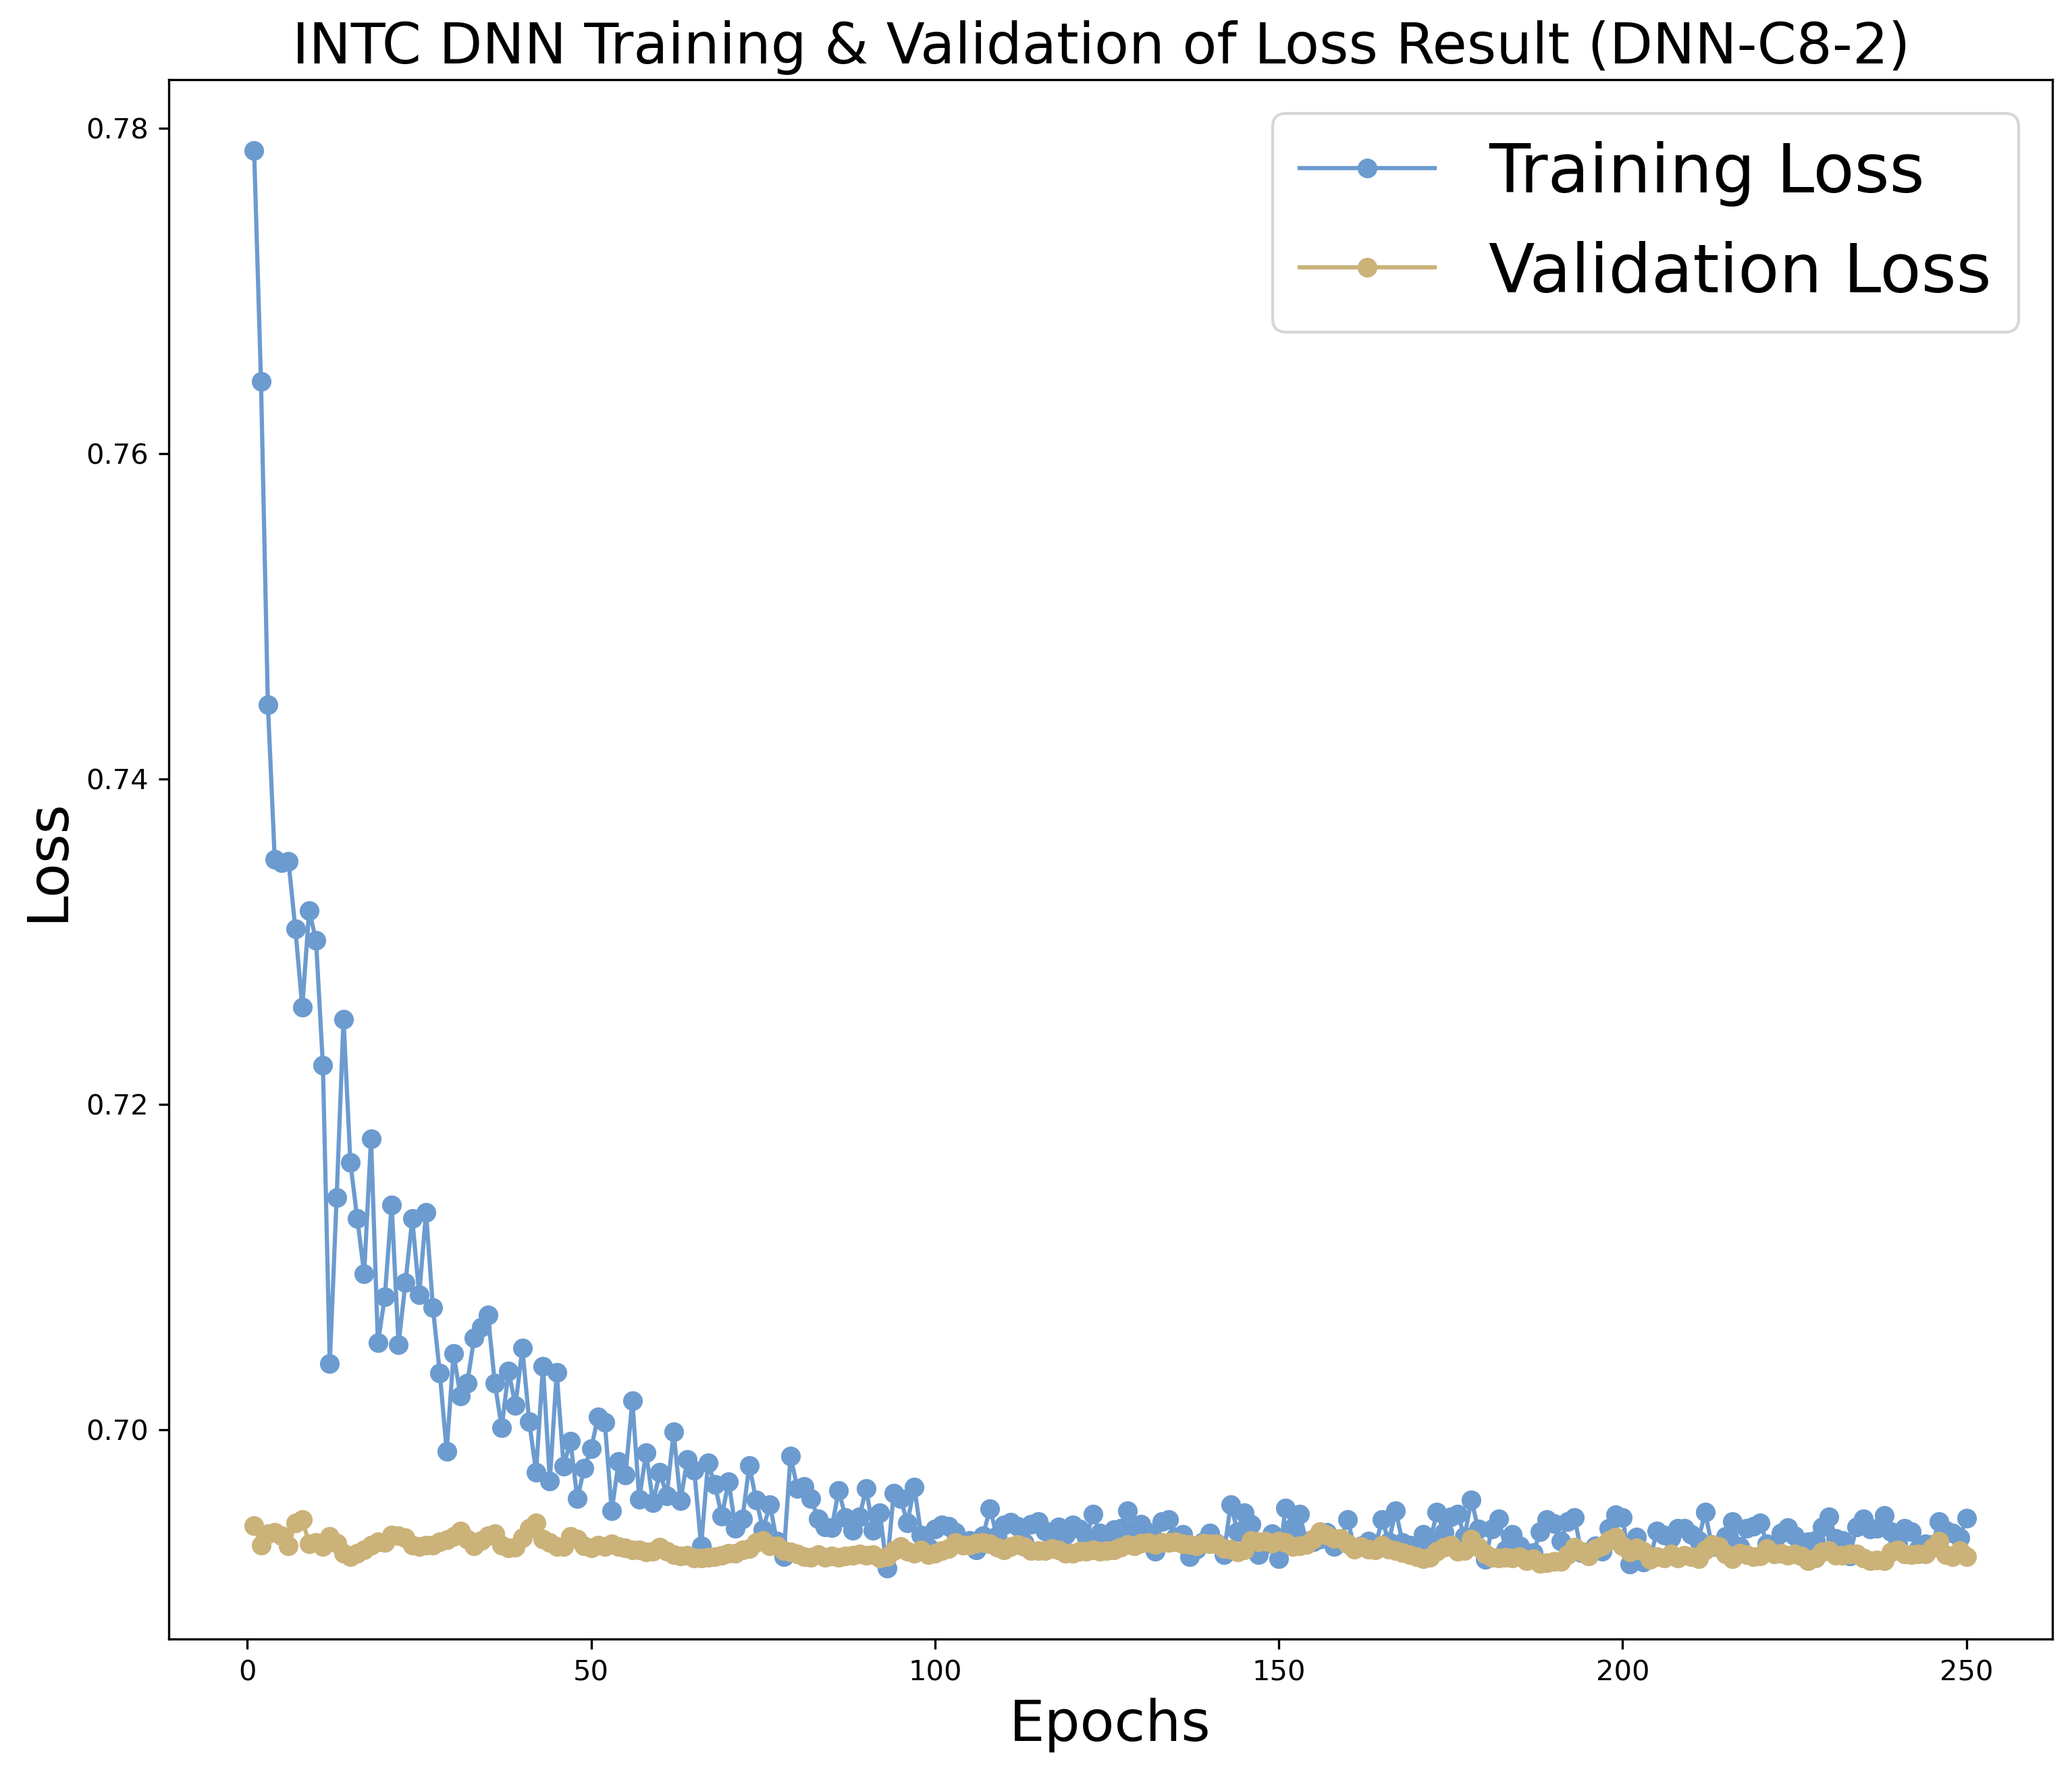

In [ ]:
# Plot the history of training and validation

training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('INTC DNN Training & Validation of Loss Result (DNN-C8-2) ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='Training Loss', color = '#6C9BCF')
plt.plot(epochs, val_loss_values,marker='o',label='Validation Loss', color = '#CBB279')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# Save the trained model
#Fmodel.save('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab

#model.save('INTC STOCK DNN_trained_model_C.h5')
model6.save('INTC STOCK DNN_trained_model_C.h5')
print('Model has been saved...')

Model has been saved...


In [ ]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
DNN_model_C = keras.models.load_model('INTC STOCK DNN_trained_model_C.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [ ]:
# 8.1 Make prediction
# X test
x_test2 = Forecast_test_data2.drop(['Date','Change'],axis=1).copy()
# Y test
y_test2 = Forecast_test_data2['Change'].copy()

prediction = DNN_model_C.predict_on_batch(x_test2)
prediction

array([[0.48636016],
       [0.49481753],
       [0.4924862 ],
       ...,
       [0.508406  ],
       [0.50462407],
       [0.494276  ]], dtype=float32)

In [ ]:
# 8.2 Transform the predictions to 0 and 1
testing_prediction=(DNN_model_C.predict_on_batch(x_test2) >= 0.5).astype('int')
testing_prediction

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test2,testing_prediction)
testing_f1s=f1_score(y_test2,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test2,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test2,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test2,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test2,testing_prediction)
print('Testing Result:')
print('Testing Accuracy Score:',round(testing_acc*100,2))
print('Testing f1 Score:',round(testing_f1s*100,2))
print('Testing Precision Score:',round(testing_pre*100,2))
print('Testing Sensitivity Score:',round(testing_sen*100,2))
print('Testing Specificity Score:',round(testing_spe*100,2))
print('')
print('Testing Confusion Matrix:')
print(testing_cm)

Testing Result:
Testing Accuracy Score: 49.56
Testing f1 Score: 32.58
Testing Precision Score: 47.7
Testing Sensitivity Score: 24.74
Testing Specificity Score: 73.66

Testing Confusion Matrix:
[[509 182]
 [505 166]]


<Figure size 1500x1500 with 0 Axes>

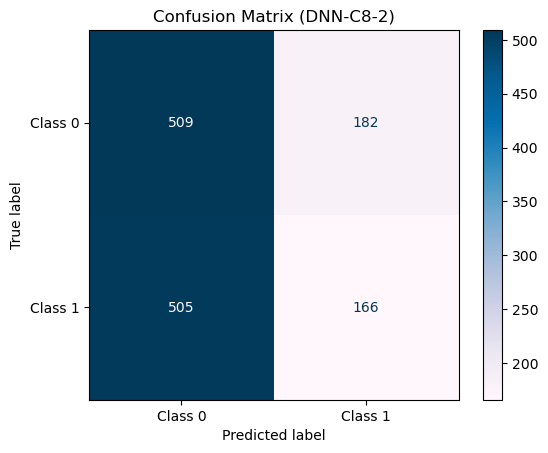

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = testing_cm, display_labels = ["Class 0", "Class 1"])
plt.figure(figsize=(10, 10), dpi=150)
display.plot(cmap='PuBu')
plt.title("Confusion Matrix (DNN-C8-2)")
plt.show()

In [ ]:
# ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, testing_prediction)

# AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.49200277789160607

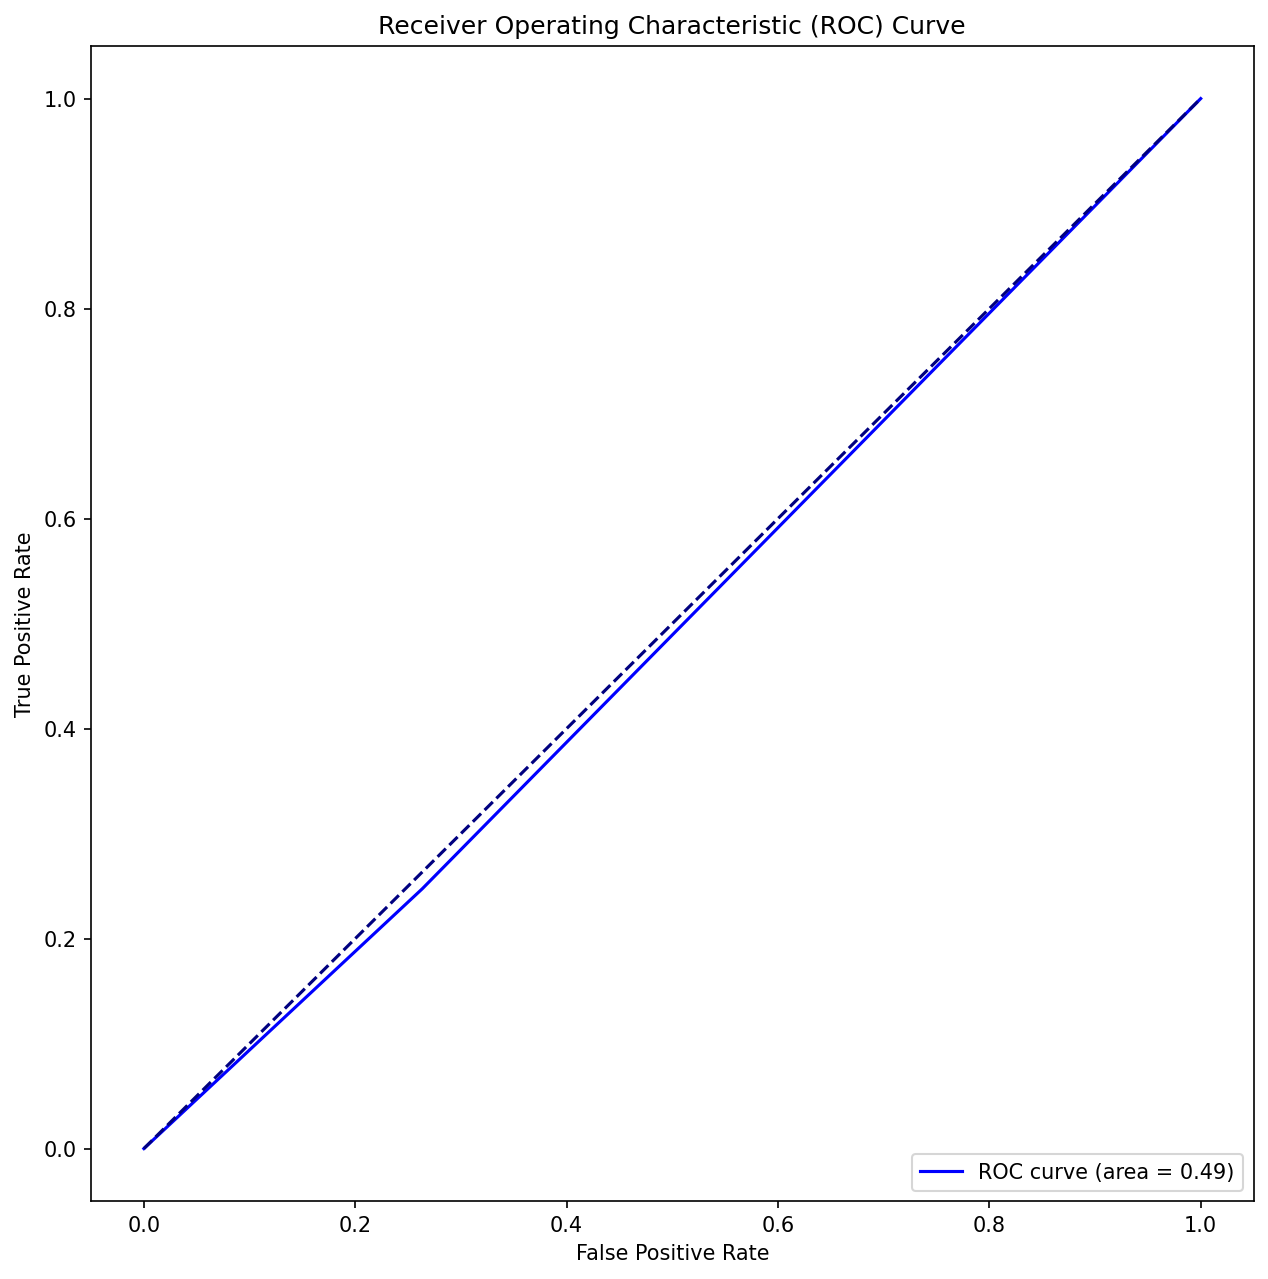

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(10, 10), dpi=150)
plt.plot(false_positive_rate, true_positive_rate, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Tip: Quick testing with the metrics set for the model by using evaluate function
DNN_model_C.evaluate(x_test2,y_test2,batch_size=64,verbose=1)

22/22 [==============================] - 0s 533us/step - loss: 0.6933 - accuracy: 0.4956


[0.6933218836784363, 0.49559471011161804]